In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from datetime import datetime
#from pandas_profiling import ProfileReport
%matplotlib inline
warnings.filterwarnings('ignore')

In [62]:
#!pip install pandas_profiling

# Loading the dataset

In [63]:
df = pd.read_csv('inventory_forecast.csv')

In [64]:
df.columns

Index(['product id', 'product_Name', 'types_of_product', ' product_Brand',
       'unit_price', 'quantity', 'price', 'tax', 'total_price', 'order _date',
       'delivery_date', 'product_availability', 'product_target_availability'],
      dtype='object')

In [65]:
df.head()

,product id,product_Name,types_of_product,product_Brand,unit_price,quantity,price,tax,total_price,order _date,delivery_date,product_availability,product_target_availability
0,Au001,Fruti,Beverage,Fruti,10,0.45 litres,300,200,500,21-05-2021,22-05-2021,0.55 litres,10 litres
1,Au002,Thumps Up,Beverage,Coca Cola,74,5 litres,100,80,180,25-04-2021,10-10-2021,21 litres,49 litres
2,Au003,Coca-Cola,Beverage,Coca Cola,15,10 litres,610,153,763,09-02-2021,22-11-2021,21 litres,41 litres
3,Au004,Sprite,Beverage,Coca Cola,25,7 litres,694,218,912,01-04-2021,18-09-2021,21 litres,43 litres
4,Au005,Sprite,Beverage,Coca Cola,49,7 litres,788,158,946,19-04-2021,07-10-2021,10 litres,42 litres


# Preprocessing the dataset

In [66]:
# Dropping 'Unnamed: 13'
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [67]:
df.head()

,product id,product_Name,types_of_product,product_Brand,unit_price,quantity,price,tax,total_price,order _date,delivery_date,product_availability,product_target_availability
0,Au001,Fruti,Beverage,Fruti,10,0.45 litres,300,200,500,21-05-2021,22-05-2021,0.55 litres,10 litres
1,Au002,Thumps Up,Beverage,Coca Cola,74,5 litres,100,80,180,25-04-2021,10-10-2021,21 litres,49 litres
2,Au003,Coca-Cola,Beverage,Coca Cola,15,10 litres,610,153,763,09-02-2021,22-11-2021,21 litres,41 litres
3,Au004,Sprite,Beverage,Coca Cola,25,7 litres,694,218,912,01-04-2021,18-09-2021,21 litres,43 litres
4,Au005,Sprite,Beverage,Coca Cola,49,7 litres,788,158,946,19-04-2021,07-10-2021,10 litres,42 litres


In [68]:
# Generate a report
#profile  = ProfileReport(df,minimal=True)
#profile.to_file(output_file="Report.html")
#profile.to_notebook_iframe()

In [69]:
df.shape

(1100, 13)

In [70]:
df.columns

Index(['product id', 'product_Name', 'types_of_product', ' product_Brand',
       'unit_price', 'quantity', 'price', 'tax', 'total_price', 'order _date',
       'delivery_date', 'product_availability', 'product_target_availability'],
      dtype='object')

In [71]:
# stastical info
df.describe()

,unit_price,price,tax,total_price
count,1100.000000,1100.000000,1100.000000,1100.000000
mean,29.963636,750.507273,245.729091,996.236364
std,11.766864,146.833081,86.122663,174.106915
min,10.000000,100.000000,80.000000,180.000000
25%,21.000000,631.000000,172.750000,867.750000
50%,30.000000,752.000000,243.500000,992.000000
75%,40.000000,878.250000,318.000000,1129.000000
max,74.000000,1000.000000,400.000000,1395.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   product id                   1100 non-null   object
 1   product_Name                 1100 non-null   object
 2   types_of_product             1100 non-null   object
 3    product_Brand               1100 non-null   object
 4   unit_price                   1100 non-null   int64 
 5   quantity                     1100 non-null   object
 6   price                        1100 non-null   int64 
 7   tax                          1100 non-null   int64 
 8   total_price                  1100 non-null   int64 
 9   order _date                  1100 non-null   object
 10  delivery_date                1100 non-null   object
 11  product_availability         1100 non-null   object
 12  product_target_availability  1100 non-null   object
dtypes: int64(4), object(9)
memory usa

In [73]:
# converting order_date and delivery_date into datetime
df['order _date'] = pd.to_datetime(df['order _date'])
df['delivery_date'] = pd.to_datetime(df['delivery_date'])

In [74]:
# datatype attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   product id                   1100 non-null   object        
 1   product_Name                 1100 non-null   object        
 2   types_of_product             1100 non-null   object        
 3    product_Brand               1100 non-null   object        
 4   unit_price                   1100 non-null   int64         
 5   quantity                     1100 non-null   object        
 6   price                        1100 non-null   int64         
 7   tax                          1100 non-null   int64         
 8   total_price                  1100 non-null   int64         
 9   order _date                  1100 non-null   datetime64[ns]
 10  delivery_date                1100 non-null   datetime64[ns]
 11  product_availability         1100 non-null 

In [75]:
# checking for unique valuesin the dataset
df.apply(lambda x: len(x.unique()))

product id                     1100
product_Name                     44
types_of_product                  5
 product_Brand                   10
unit_price                       42
quantity                         34
price                           449
tax                             298
total_price                     521
order _date                     152
delivery_date                   184
product_availability             94
product_target_availability     123
dtype: int64

In [76]:
# check for null values
df.isnull().sum()

product id                     0
product_Name                   0
types_of_product               0
 product_Brand                 0
unit_price                     0
quantity                       0
price                          0
tax                            0
total_price                    0
order _date                    0
delivery_date                  0
product_availability           0
product_target_availability    0
dtype: int64

In [77]:
# check for categorical attributes
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
cat_col

['product id',
 'product_Name',
 'types_of_product',
 ' product_Brand',
 'quantity',
 'product_availability',
 'product_target_availability']

# Exploratory Data Analysis

In [78]:
df.columns

Index(['product id', 'product_Name', 'types_of_product', ' product_Brand',
       'unit_price', 'quantity', 'price', 'tax', 'total_price', 'order _date',
       'delivery_date', 'product_availability', 'product_target_availability'],
      dtype='object')

[Text(0, 0, 'Fruti'),
 Text(1, 0, 'Thumps Up'),
 Text(2, 0, 'Coca-Cola'),
 Text(3, 0, 'Sprite'),
 Text(4, 0, 'Honest Tea'),
 Text(5, 0, 'Lays'),
 Text(6, 0, 'Bhel Puri'),
 Text(7, 0, 'Tasty Nuts'),
 Text(8, 0, 'Bhujia Sev'),
 Text(9, 0, 'Aloo Bhujia'),
 Text(10, 0, 'Uncle Chips'),
 Text(11, 0, 'Uncle Chips(spicy)'),
 Text(12, 0, 'Soda Stream'),
 Text(13, 0, 'Tropicana'),
 Text(14, 0, 'Pepsi'),
 Text(15, 0, 'Gatorade'),
 Text(16, 0, 'Quaker Oats'),
 Text(17, 0, 'Walker'),
 Text(18, 0, 'Gamesa'),
 Text(19, 0, 'Lite Horlicks'),
 Text(20, 0, "Mother's Horlicks"),
 Text(21, 0, 'Horlicks'),
 Text(22, 0, "Women's Horlicks"),
 Text(23, 0, 'Aloe Vera Juice'),
 Text(24, 0, 'Amla Juice'),
 Text(25, 0, 'Gilloy Juice'),
 Text(26, 0, 'Tulsi Juice'),
 Text(27, 0, 'Mango Panna'),
 Text(28, 0, 'Lays-IMM'),
 Text(29, 0, 'Lays-ASCO'),
 Text(30, 0, 'Kinley'),
 Text(31, 0, 'Kurkure'),
 Text(32, 0, 'Kurkure-TA'),
 Text(33, 0, 'Kurkure-Puff'),
 Text(34, 0, 'Groundnut Oil'),
 Text(35, 0, 'Sunflower Oil'),
 Te

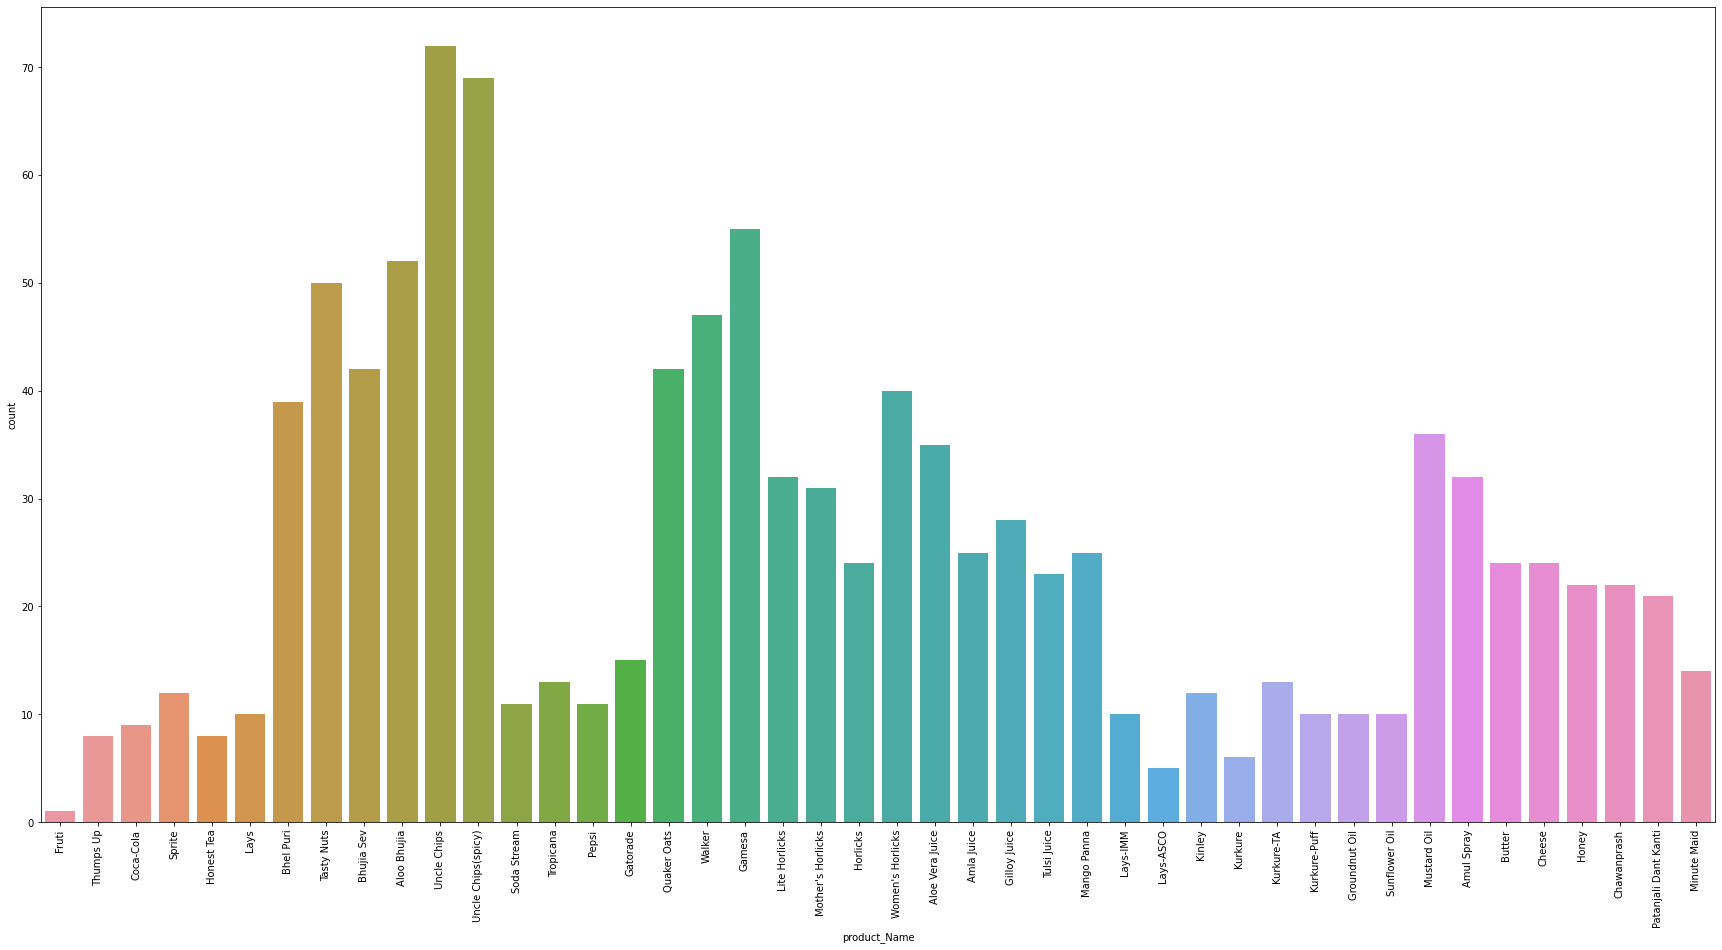

In [79]:
plt.figure(figsize=(30,15))
l = list(df['product_Name'].unique())
chart = sns.countplot(df["product_Name"])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

[Text(0, 0, 'Beverage'),
 Text(1, 0, 'Snacks'),
 Text(2, 0, 'Health Supplement'),
 Text(3, 0, 'Grocery'),
 Text(4, 0, 'Dairy')]

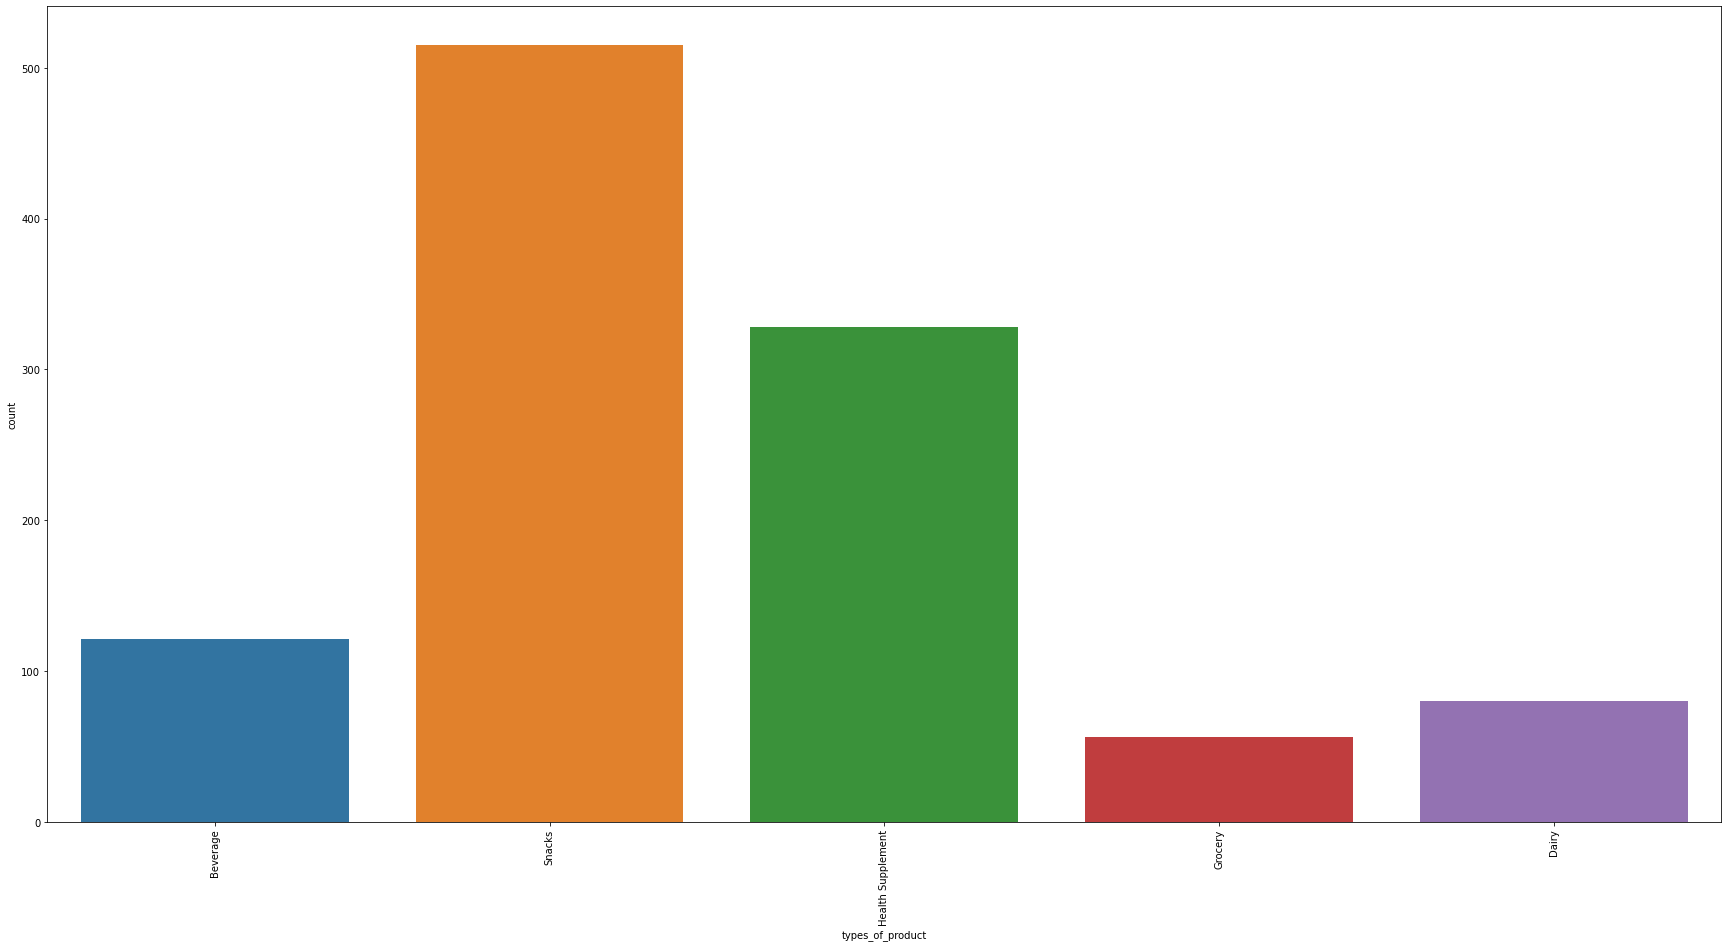

In [80]:
plt.figure(figsize=(30,15))
l = list(df['types_of_product'].unique())
chart = sns.countplot(df["types_of_product"])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [81]:
df.groupby('types_of_product').size()

types_of_product
Beverage             121
Dairy                 80
Grocery               56
Health Supplement    328
Snacks               515
dtype: int64

[Text(0, 0, 'Fruti'),
 Text(1, 0, 'Coca Cola'),
 Text(2, 0, 'Pepsi'),
 Text(3, 0, 'Haldiram'),
 Text(4, 0, 'Uncle Chips'),
 Text(5, 0, 'HUL'),
 Text(6, 0, 'Patanjali'),
 Text(7, 0, 'Freedom'),
 Text(8, 0, 'Engine'),
 Text(9, 0, 'Amul')]

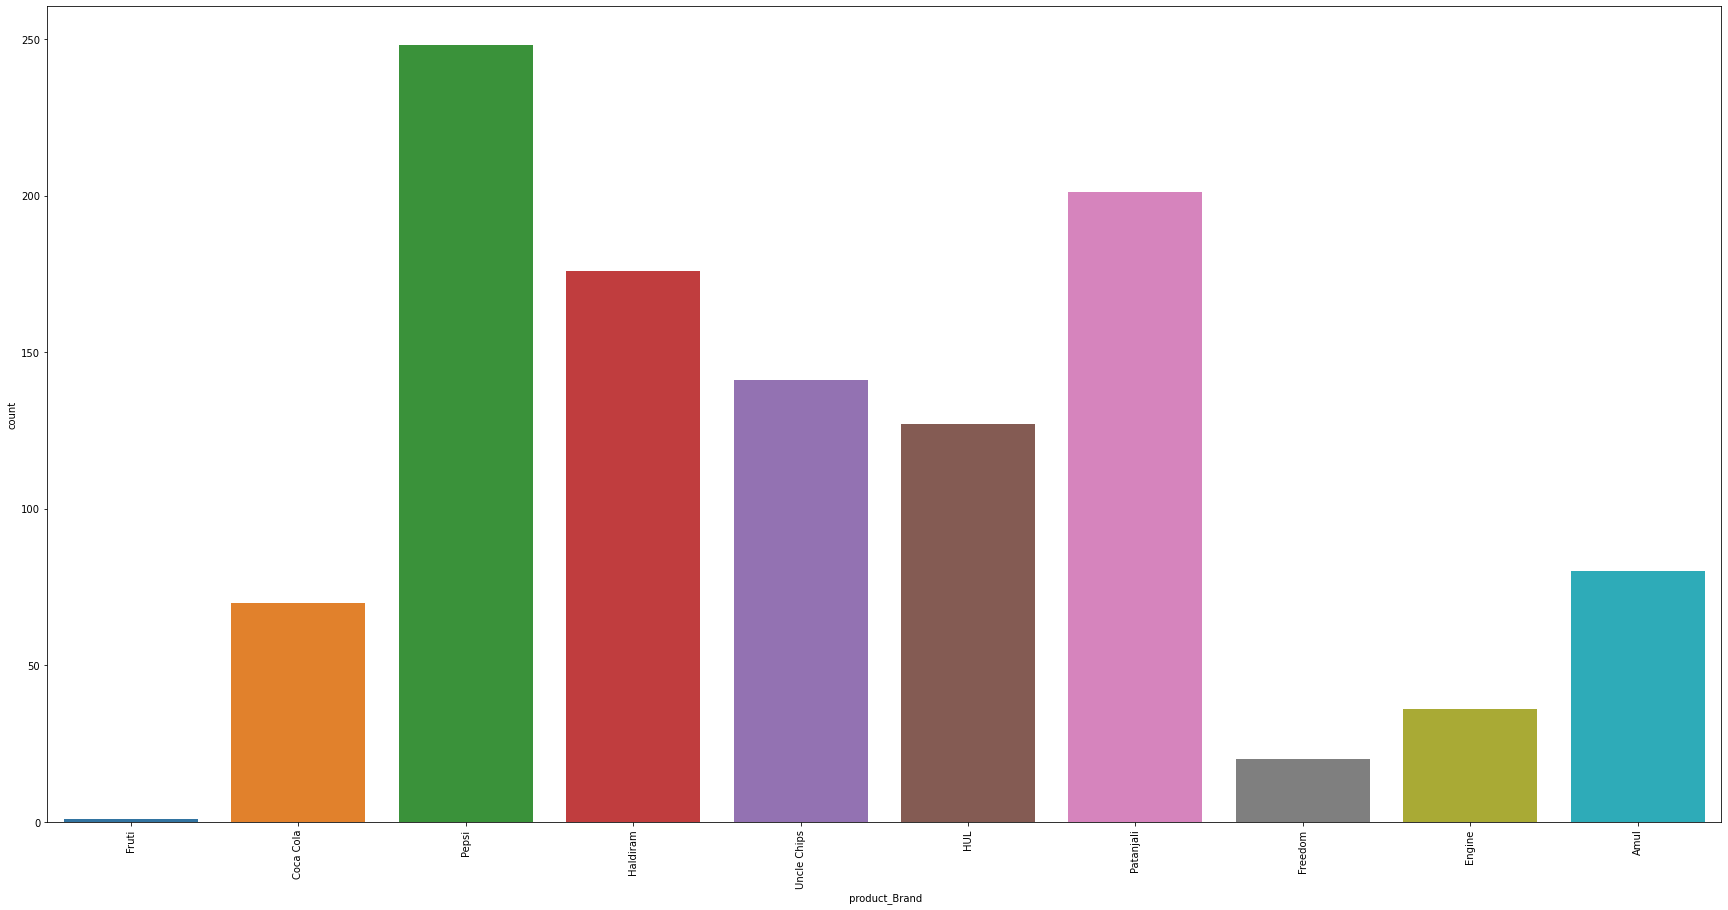

In [82]:
plt.figure(figsize=(30,15))
l = list(df[' product_Brand'].unique())
chart = sns.countplot(df[" product_Brand"])
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

In [83]:
df.groupby(' product_Brand').size()

 product_Brand
Amul            80
Coca Cola       70
Engine          36
Freedom         20
Fruti            1
HUL            127
Haldiram       176
Patanjali      201
Pepsi          248
Uncle Chips    141
dtype: int64

In [84]:
# Total days from date of order  to receiving the order
df['D_O'] = (df['delivery_date'] - df['order _date']).dt.days.astype(float)

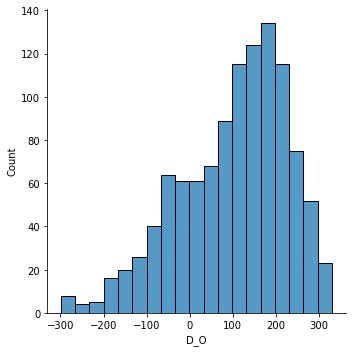

In [85]:
sns.displot(df['D_O'])

In [86]:
# Dropping order _date and delivery_date
df = df.drop(columns=['product id','order _date','delivery_date'], axis=1)

In [87]:
df.head()

,product_Name,types_of_product,product_Brand,unit_price,quantity,price,tax,total_price,product_availability,product_target_availability,D_O
0,Fruti,Beverage,Fruti,10,0.45 litres,300,200,500,0.55 litres,10 litres,1.0
1,Thumps Up,Beverage,Coca Cola,74,5 litres,100,80,180,21 litres,49 litres,168.0
2,Coca-Cola,Beverage,Coca Cola,15,10 litres,610,153,763,21 litres,41 litres,81.0
3,Sprite,Beverage,Coca Cola,25,7 litres,694,218,912,21 litres,43 litres,257.0
4,Sprite,Beverage,Coca Cola,49,7 litres,788,158,946,10 litres,42 litres,82.0


In [88]:
# Replacing litres and kg in quantity
df['quantity']=df['quantity'].apply(lambda x: str(x).replace(' litres','') if ' litres' in str(x) else str(x))
df['quantity']=df['quantity'].apply(lambda x: str(x).replace(' Kg','') if ' Kg' in str(x) else str(x))
df['quantity']=df['quantity'].apply(lambda x: str(x).replace(' kg','') if ' kg' in str(x) else str(x))

In [89]:
# Replacing litres and kg in product_availability
df['product_availability']=df['product_availability'].apply(lambda x: str(x).replace(' litres','') if ' litres' in str(x) else str(x))
df['product_availability']=df['product_availability'].apply(lambda x: str(x).replace(' Kg','') if ' Kg' in str(x) else str(x))
df['product_availability']=df['product_availability'].apply(lambda x: str(x).replace(' kg','') if ' kg' in str(x) else str(x))

In [90]:
# Replacing litres and kg in product_target_availability
df['product_target_availability']=df['product_target_availability'].apply(lambda x: str(x).replace(' litres','') if ' litres' in str(x) else str(x))
df['product_target_availability']=df['product_target_availability'].apply(lambda x: str(x).replace(' Kg','') if ' Kg' in str(x) else str(x))
df['product_target_availability']=df['product_target_availability'].apply(lambda x: str(x).replace(' kg','') if ' kg' in str(x) else str(x))

In [91]:
df.head()

,product_Name,types_of_product,product_Brand,unit_price,quantity,price,tax,total_price,product_availability,product_target_availability,D_O
0,Fruti,Beverage,Fruti,10,0.45,300,200,500,0.55,10,1.0
1,Thumps Up,Beverage,Coca Cola,74,5,100,80,180,21,49,168.0
2,Coca-Cola,Beverage,Coca Cola,15,10,610,153,763,21,41,81.0
3,Sprite,Beverage,Coca Cola,25,7,694,218,912,21,43,257.0
4,Sprite,Beverage,Coca Cola,49,7,788,158,946,10,42,82.0


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_Name                 1100 non-null   object 
 1   types_of_product             1100 non-null   object 
 2    product_Brand               1100 non-null   object 
 3   unit_price                   1100 non-null   int64  
 4   quantity                     1100 non-null   object 
 5   price                        1100 non-null   int64  
 6   tax                          1100 non-null   int64  
 7   total_price                  1100 non-null   int64  
 8   product_availability         1100 non-null   object 
 9   product_target_availability  1100 non-null   object 
 10  D_O                          1100 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 94.7+ KB


In [93]:
# Converting unit_price,product_availability and product_target_availability into float
df['quantity'] = df['quantity'].astype(float)
df['product_availability'] = df['product_availability'].astype(float)
df['product_target_availability'] = df['product_target_availability'].astype(float)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_Name                 1100 non-null   object 
 1   types_of_product             1100 non-null   object 
 2    product_Brand               1100 non-null   object 
 3   unit_price                   1100 non-null   int64  
 4   quantity                     1100 non-null   float64
 5   price                        1100 non-null   int64  
 6   tax                          1100 non-null   int64  
 7   total_price                  1100 non-null   int64  
 8   product_availability         1100 non-null   float64
 9   product_target_availability  1100 non-null   float64
 10  D_O                          1100 non-null   float64
dtypes: float64(4), int64(4), object(3)
memory usage: 94.7+ KB


Text(0.5, 0, 'Total Days')

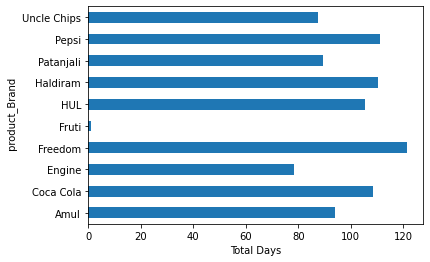

In [95]:
df.groupby(by=' product_Brand')['D_O'].mean().plot(kind  ='barh')
plt.xlabel('Total Days')

Text(0.5, 0, 'product_availability')

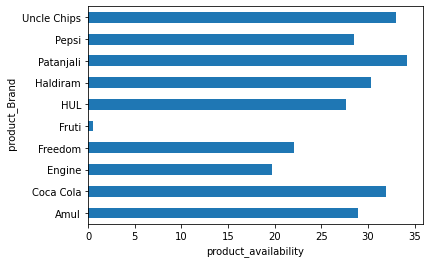

In [96]:
df.groupby(by=' product_Brand')['product_availability'].mean().plot(kind  ='barh')
plt.xlabel('product_availability')

Text(0.5, 0, 'tax')

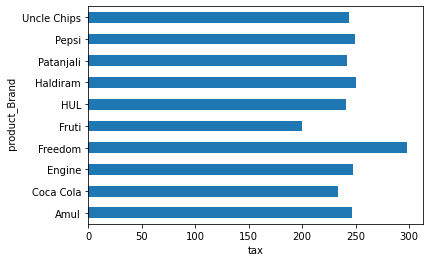

In [97]:
df.groupby(by=' product_Brand')['tax'].mean().plot(kind  ='barh')
plt.xlabel('tax')

Text(0.5, 0, 'product_target_availability')

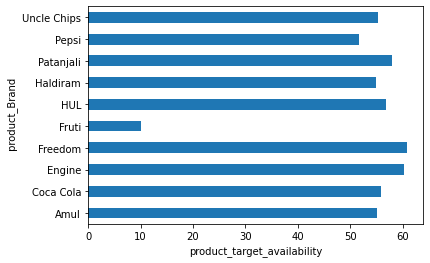

In [98]:
df.groupby(by=' product_Brand')['product_target_availability'].mean().plot(kind  ='barh')
plt.xlabel('product_target_availability')

Text(0.5, 0, 'unit_price')

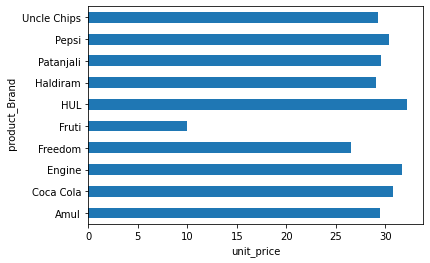

In [99]:
df.groupby(by=' product_Brand')['unit_price'].mean().plot(kind  ='barh')
plt.xlabel('unit_price')

Text(0.5, 0, 'Total Days')

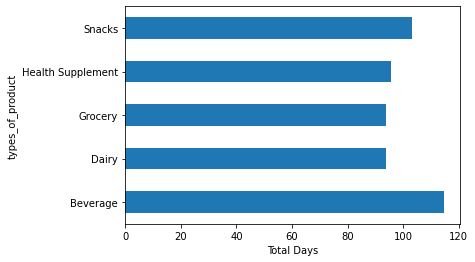

In [100]:
df.groupby(by='types_of_product')['D_O'].mean().plot(kind  ='barh')
plt.xlabel('Total Days')

Text(0.5, 0, 'product_availability')

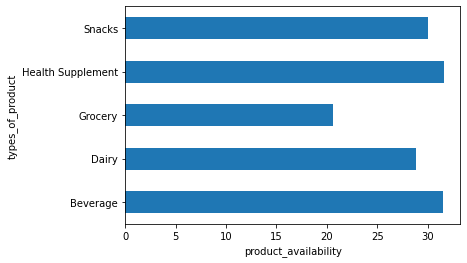

In [101]:
df.groupby(by='types_of_product')['product_availability'].mean().plot(kind  ='barh')
plt.xlabel('product_availability')

Text(0.5, 0, 'product_target_availability')

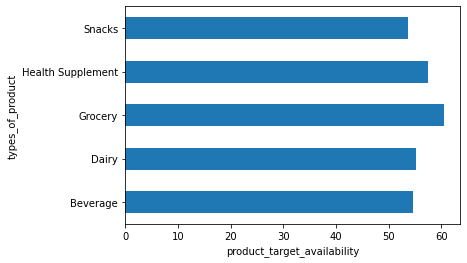

In [102]:
df.groupby(by='types_of_product')['product_target_availability'].mean().plot(kind  ='barh')
plt.xlabel('product_target_availability')

Text(0.5, 0, 'tax')

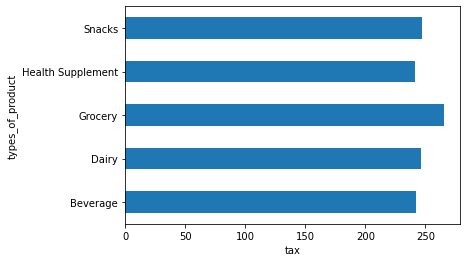

In [103]:
df.groupby(by='types_of_product')['tax'].mean().plot(kind  ='barh')
plt.xlabel('tax')

Text(0.5, 0, 'unit_price')

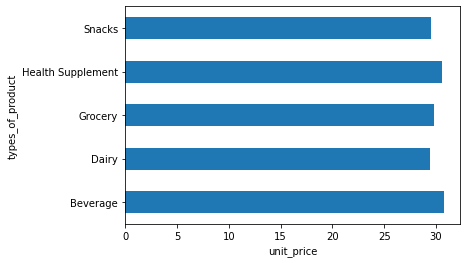

In [104]:
df.groupby(by='types_of_product')['unit_price'].mean().plot(kind  ='barh')
plt.xlabel('unit_price')

In [105]:
# Top 10 Products by availability

# Grouping Product by target
prod_sales = pd.DataFrame(df.groupby('product_Name').sum()['product_availability'])

# Sorting the dataframe in descending order
prod_sales.sort_values(by=['product_availability'],inplace=True,ascending=False)

# Top 10 products by sales
prod_sales[:10]

,product_availability
product_Name,
Uncle Chips,2434.0
Uncle Chips(spicy),2215.0
Aloo Bhujia,1663.0
Gamesa,1647.0
Tasty Nuts,1562.0
Walker,1343.0
Aloe Vera Juice,1330.0
Bhujia Sev,1302.0
Quaker Oats,1231.0


In [106]:
# Top 10 Products by target

# Grouping Product by target
prod_sales = pd.DataFrame(df.groupby('product_Name').sum()['product_target_availability'])

# Sorting the dataframe in descending order
prod_sales.sort_values(by=['product_target_availability'],inplace=True,ascending=False)

# Top 10 products by sales
prod_sales[:10]

,product_target_availability
product_Name,
Uncle Chips(spicy),3944.0
Uncle Chips,3862.0
Aloo Bhujia,2925.0
Gamesa,2908.0
Tasty Nuts,2819.0
Walker,2492.0
Bhujia Sev,2393.0
Quaker Oats,2317.0
Women's Horlicks,2247.0


# Correlation Matrix

<AxesSubplot:>

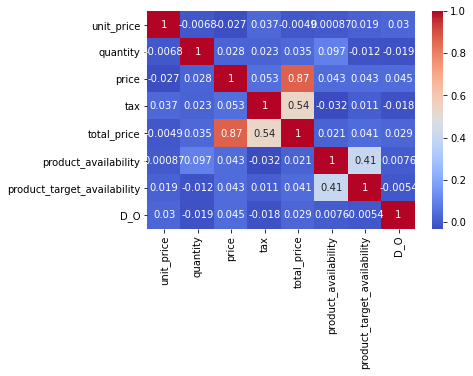

In [107]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [108]:
df.columns

Index(['product_Name', 'types_of_product', ' product_Brand', 'unit_price',
       'quantity', 'price', 'tax', 'total_price', 'product_availability',
       'product_target_availability', 'D_O'],
      dtype='object')

In [109]:
df = pd.get_dummies(df,columns=['product_Name','product_availability', 'types_of_product',' product_Brand'])

In [110]:
df.shape

(1100, 121)

In [111]:
df.head()

,unit_price,quantity,price,tax,total_price,product_target_availability,D_O,product_Name_Aloe Vera Juice,product_Name_Aloo Bhujia,product_Name_Amla Juice,...,product_Brand_Amul,product_Brand_Coca Cola,product_Brand_Engine,product_Brand_Freedom,product_Brand_Fruti,product_Brand_HUL,product_Brand_Haldiram,product_Brand_Patanjali,product_Brand_Pepsi,product_Brand_Uncle Chips
0,10,0.45,300,200,500,10.0,1.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,74,5.00,100,80,180,49.0,168.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,15,10.00,610,153,763,41.0,81.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,25,7.00,694,218,912,43.0,257.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,49,7.00,788,158,946,42.0,82.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Columns: 121 entries, unit_price to  product_Brand_Uncle Chips
dtypes: float64(3), int64(4), uint8(114)
memory usage: 182.7 KB


# Input Split

In [113]:
X = df.loc[:, df.columns != 'product_availability']
y = df.iloc[:,5].values

# Model Training and Testing

In [114]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
print("Shape of X_train:",X_train.shape)
print("Shape of X_test:",X_test.shape)
print("Shape of y_train:",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of X_train: (880, 121)
Shape of X_test: (220, 121)
Shape of y_train: (880,)
Shape of y_test: (220,)


# Linear Regression

In [115]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [116]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head(20)

,Actual,Predicted
0,44.0,44.000000
1,81.0,81.000000
2,54.0,54.000000
3,51.0,51.000000
4,59.0,59.000000
5,40.0,40.000000
6,90.0,89.999993
7,61.0,61.000000
8,54.0,54.000000
9,50.0,50.000000


In [117]:
model.score(X_test,y_test)

0.9999999999999937

In [118]:
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [119]:
rfc  = RandomForestClassifier(n_estimators=30)
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=30)

In [120]:
rfc.score(X_test,y_test)

0.37727272727272726